In [1]:
import yfinance as yf
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
btc_ticker = yf.Ticker("BTC-USD")
if os.path.exists("btc.csv"):
    btc = pd.read_csv("btc.csv", index_col=0)
else:
    btc = btc_ticker.history(period="max")
    btc.to_csv("btc.csv")
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2024-05-30 00:00:00+00:00,67576.085938,69500.539062,67118.078125,68364.992188,29509712534,0.0,0.0
2024-05-31 00:00:00+00:00,68362.515625,68999.562500,66633.421875,67491.414062,27387283769,0.0,0.0
2024-06-01 00:00:00+00:00,67489.609375,67839.765625,67386.195312,67706.937500,11641495604,0.0,0.0


In [3]:
btc.index = pd.to_datetime(btc.index)
del btc["Dividends"]
del btc["Stock Splits"]


<Axes: xlabel='Date'>

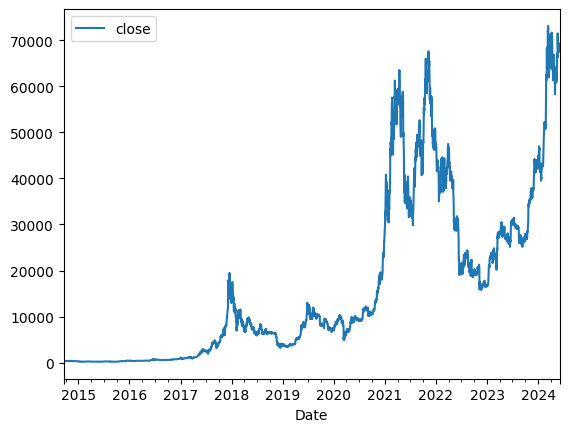

In [4]:
btc.columns = [c.lower() for c in btc.columns]
btc.plot.line(y="close", use_index=True)

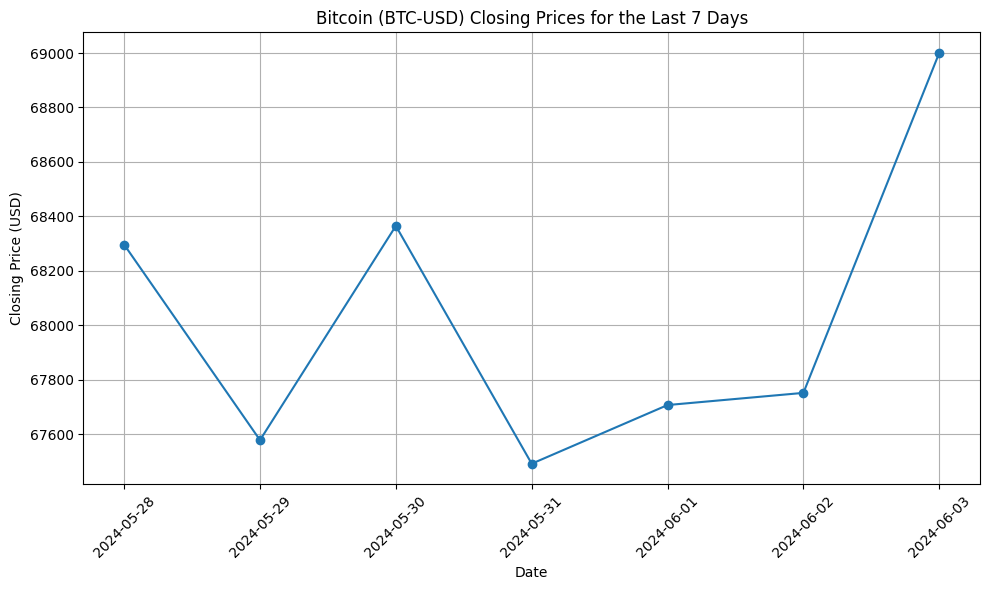

In [5]:
last_seven_days_btc = btc[-7:]

# Plot the closing price for the last seven days
plt.figure(figsize=(10, 6))
plt.plot(last_seven_days_btc.index, last_seven_days_btc['close'], marker='o')
plt.title('Bitcoin (BTC-USD) Closing Prices for the Last 7 Days')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
wiki = pd.read_csv("bitcoin_sentiment.csv", index_col=0, parse_dates=True)
wiki

,edit_count,sentiment,neg_sentiment
2010-07-14,3.233333,0.249862,0.335852
2010-07-15,3.233333,0.238381,0.344185
2010-07-16,3.400000,0.245027,0.344185
2010-07-18,3.400000,0.205484,0.360852
2010-07-19,3.500000,0.203443,0.360852
...,...,...,...
2024-05-16,2.533333,-0.301005,0.646032
2024-05-21,2.633333,-0.348237,0.671032
2024-05-22,2.833333,-0.364329,0.678439
2024-05-24,2.800000,-0.400286,0.695106


In [7]:
# Assuming 'btc' dataframe has a timezone-aware datetime index
# Localize timezone for 'wiki' dataframe if it's tz-naive
if wiki.index.tz is None:
    wiki.index = wiki.index.tz_localize('UTC')

# Merge the dataframes
btc = btc.merge(wiki, left_index=True, right_index=True)

# Continue with the rest of your code
btc["tomorrow"] = btc["close"].shift(-1)
btc["target"] = (btc["tomorrow"] > btc["close"]).astype(int)
btc["target"].value_counts()


target
1    872
0    758
Name: count, dtype: int64

In [8]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,6.000000,-0.303405,0.650209,424.440002,0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,5.933333,-0.319340,0.658542,394.795990,0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,5.933333,-0.319830,0.658542,408.903992,1
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,5.766667,-0.324750,0.660923,398.821014,0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,5.800000,-0.295682,0.644257,435.790985,1
...,...,...,...,...,...,...,...,...,...,...
2024-05-16 00:00:00+00:00,66256.109375,66712.429688,64613.054688,65231.582031,31573077994,2.533333,-0.301005,0.646032,70136.531250,1
2024-05-21 00:00:00+00:00,71443.062500,71946.460938,69191.125000,70136.531250,46932005990,2.633333,-0.348237,0.671032,69122.335938,0
2024-05-22 00:00:00+00:00,70135.320312,70623.695312,68977.695312,69122.335938,32802561717,2.833333,-0.364329,0.678439,68526.101562,0
2024-05-24 00:00:00+00:00,67928.132812,69220.296875,66622.671875,68526.101562,29197308153,2.800000,-0.400286,0.695106,68518.093750,0


In [9]:
btc.to_csv('btcSentimet.csv')